# Week 1

## Week 1 Learning videos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

Fix
Can we plot corelation of all variables wrt target / predictor variable?

In [ ]:
os.chdir('C:/Users/lsreeram/Downloads/_/GL/04 Data Mining/Week 1/Learning Videos')

In [ ]:
df =pd.read_excel('Delhi_Pollution_data+29.xlsx')

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.duplicated().sum()

In [ ]:
df.isnull().sum()

In [ ]:
df['City'].value_counts()

In [ ]:
df['AQI'].value_counts()

In [ ]:
df_pca = df.drop(['City', 'Date', 'AQI', 'AQI_Bucket'], axis = 1)

In [ ]:
df_pca.head(3)

In [ ]:
len(df_pca.columns)

In [ ]:
plt.figure(figsize = (12,8))
for i in range(len(df_pca.columns)):
    plt.subplot(3,4, i+1)
    sns.boxplot(y = df_pca[df_pca.columns[i]], data = df_pca)
    plt.title('Boxplot of {}'.format(df_pca.columns[i]))
    plt.tight_layout()
                

In [ ]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25, 0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range, upper_range

In [ ]:
for i in df_pca.columns:
    LL,UL=remove_outlier(df_pca[i])
    df_pca[i] = np.where(df_pca[i] > UL, UL, df_pca[i])
    df_pca[i] = np.where(df_pca[i] < LL, LL, df_pca[i])

In [ ]:
plt.figure(figsize = (12,8))
for i in range(len(df_pca.columns)):
    plt.subplot(3,4, i+1)
    sns.boxplot(y = df_pca[df_pca.columns[i]], data = df_pca)
    plt.title('Boxplot of {}'.format(df_pca.columns[i]))
    plt.tight_layout()

In [ ]:
df_pca.describe().T

In [ ]:
#Scale the data
from scipy.stats import zscore
df_pca_scaled = df_pca.apply(zscore)

In [ ]:
df_pca_scaled.head()

In [ ]:
df_pca_scaled.describe().T

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df_pca_scaled.corr(), annot=True, fmt='.2f');

In [ ]:
!pip install factor-analyzer

In [ ]:
#Fix : How do we create H0, H1?

#Confirm the statistical significance of correlations
#H0: Correlations are not significant, H1: There are significant correlations
#Reject H0 if p-value < 0.05
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_pca_scaled)
p_value

In [ ]:
#Confirm the adequacy of sample size. 
#Note: Above 0.7 is good, below 0.5 is not acceptable
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_pca_scaled)
kmo_model

In [ ]:
#Fix what is random_state?
#Fix: What is pca_transformed for?

#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=12, random_state=123)
pca_transformed = pca.fit_transform(df_pca_scaled)

In [ ]:
#Extract eigen vectors
pca.components_

In [ ]:
pca.explained_variance_

In [ ]:
pca.explained_variance_ratio_

In [ ]:
#Create a dataframe containing the loadings or coefficients of all PCs
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12'],
                                    index = df_pca_scaled.columns)

In [ ]:
#Create a scree plot
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,13),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

In [ ]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

In [ ]:
#Fix how do we choose based on variance?

#Choose the PCs basis cumulative explained variance
df_selected = df_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5']]

In [ ]:
#Check the selected PCs
df_selected

In [ ]:
#Check as to how the original features matter to each PC
#Note: Here we are only considering the absolute values
plt.figure(figsize = (12,8))
for i in range(len(df_selected.columns)):
    plt.subplot(3,2,i+1)
    abs(df_selected[df_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(df_selected.columns[i]))
    plt.tight_layout()

In [ ]:
#Compare how the original features influence various PCs
plt.figure(figsize = (12,8))
sns.heatmap(abs(df_selected), annot = True, cmap = 'Blues',fmt = '.2f');

In [ ]:
#In order to calculate PC scores we need loadings, below:
df_selected

In [ ]:
#...and we need the original scaled features
df_pca_scaled.iloc[0]

In [ ]:
#What is feature & what is loadings, score?

#We need to perform a dot product between the loadings and features to obtain the scores
for i in df_selected.columns:
    pc_score = np.dot(df_selected[i], df_pca_scaled.iloc[0])
    print(round(pc_score, 6), end = ' ')

In [ ]:
#Above step involves a lot of hard work. Let's do it the easier way
#Extract the required(as per the cumulative explained variance) number of PCs
pca = PCA(n_components=5, random_state=123)
pca_final = pca.fit_transform(df_pca_scaled)

In [ ]:
#Fix What are we scaling?
#Just create a dataframe out of fit_transformed scaled data above
#Note: Notice the output of cell 34 and the first row of the dataframe below
pca_final_df = pd.DataFrame(pca_final, columns = df_selected.columns)
pca_final_df.head(10)

In [ ]:
#Check for presence of correlations among teh PCs
plt.figure(figsize = (10,8))
sns.heatmap(pca_final_df.corr(), annot=True,fmt='.2f');

## Week 1 Practice

In [ ]:
os.chdir('C:/Users/lsreeram/Downloads/_/GL/04 Data Mining/Week 1/Practice Quiz')

In [ ]:
df= pd.read_csv('Redwine Quality.csv')

In [ ]:
df_pca.head(3)

In [ ]:
df_pca.info()

In [ ]:
df.isnull().sum()

In [ ]:
#Check for presence of duplicate rows
df.duplicated().sum()

In [ ]:
df_pca= df.drop(['Unnamed: 0'], axis=1)

In [ ]:
df_pca.head(3)

In [ ]:
len(df_pca.columns)

In [ ]:
plt.figure(figsize= (12,8))

for i in range(len(df.columns)):
    plt.subplot(3,4, i+1)
    sns.boxplot(y=df_pca.columns[i], data=df_pca)
    plt.title('Boxplot of {}'.format(df_pca.columns[i]))
    plt.tight_layout()


In [ ]:
def remove_outlier(col):
    Q1,Q3=col.quantile([.25,.75])
    IQR = Q3-Q1
    lower_range = Q1-(IQR*1.5)
    upper_range = Q3+ (IQR*1.5)
    return lower_range, upper_range

In [ ]:
feature_list = df_pca.columns
#Cap & floor the values beyond the outlier boundaries
for i in feature_list:
    LL, UL = remove_outlier(df_pca[i])
    df_pca[i] = np.where(df_pca[i] > UL, UL, df_pca[i])
    df_pca[i] = np.where(df_pca[i] < LL, LL, df_pca[i])

In [ ]:
plt.figure(figsize=(12,8))
for i in range(len(feature_list)):
    plt.subplot(3,4,i+1)
    sns.boxplot(y=df_pca.columns[i], data=df_pca)
    plt.title('Boxplot of {}'.format(df_pca.columns[i]))
    plt.tight_layout()

In [ ]:
df_pca.describe().T

In [ ]:
from scipy.stats import zscore
df_pca_scaled=df_pca.apply(zscore)

In [ ]:
df_pca_scaled.head(3)

In [ ]:
df_pca_scaled.describe().T

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df_pca_scaled.corr(), annot=True, fmt='.2f');

In [ ]:
#Confirm the statistical significance of correlations
#H0: Correlations are not significant, H1: There are significant correlations
#Reject H0 if p-value < 0.05
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_pca_scaled)
p_value

In [ ]:
#Fix how do we proceed?

#Confirm the adequacy of sample size. 
#Note: Above 0.7 is good, below 0.5 is not acceptable
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_pca_scaled)
kmo_model

In [ ]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=11, random_state=123)
pca_transformed = pca.fit_transform(df_pca_scaled)

In [ ]:
#Extract eigen vectors
pca.components_

In [ ]:
pca.explained_variance_

In [ ]:
pca.explained_variance_ratio_

In [ ]:
#Create a dataframe containing the loadings or coefficients of all PCs
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8', 'PC9', 'PC10', 'PC11'],
                                    index = df_pca_scaled.columns)

In [ ]:
df_extracted_loadings.head(3)

In [ ]:
#Create a scree plot
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,12),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

In [ ]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

In [ ]:
#Choose the PCs basis cumulative explained variance
df_selected = df_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5','PC6']]

In [ ]:
#Check the selected PCs
df_selected.head(3)

In [ ]:
#Check as to how the original features matter to each PC
#Note: Here we are only considering the absolute values
plt.figure(figsize = (12,8))
for i in range(len(df_selected.columns)):
    plt.subplot(3,2,i+1)
    abs(df_selected[df_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(df_selected.columns[i]))
    plt.tight_layout()

In [ ]:
#Compare how the original features influence various PCs
plt.figure(figsize = (12,8))
sns.heatmap(abs(df_selected), annot = True, cmap = 'Blues',fmt = '.2f');

In [ ]:
#...and we need the original scaled features
df_pca_scaled.iloc[0]

In [ ]:
#We need to perform a dot product between the loadings and features to obtain the scores
for i in df_selected.columns:
    pc_score = np.dot(df_selected[i], df_pca_scaled.iloc[0])
    print(round(pc_score, 6), end = ' ')

In [ ]:
#Above step involves a lot of hard work. Let's do it the easier way
#Extract the required(as per the cumulative explained variance) number of PCs
pca = PCA(n_components=6, random_state=123)
pca_final = pca.fit_transform(df_pca_scaled)

In [ ]:
#Just create a dataframe out of fit_transformed scaled data above
#Note: Notice the output of cell 34 and the first row of the dataframe below
pca_final_df = pd.DataFrame(pca_final, columns = df_selected.columns)
pca_final_df.head(10)

In [ ]:
#Check for presence of correlations among teh PCs
plt.figure(figsize = (10,8))
sns.heatmap(pca_final_df.corr(), annot=True,fmt='.2f');

In [ ]:
# Practice Test:

# Python code to demonstrate the
# use of numpy.cov
import numpy as np
 
x = [1.23, 2.12, 3.34, 4.5]
 
y = [2.56, 2.89, 3.76, 3.95]
 
# find out covariance with respect  rows
cov_mat = np.stack((x, y), axis = 1)
 
print("shape of matrix x and y:", np.shape(cov_mat))
 
print("shape of covariance matrix:", np.shape(np.cov(cov_mat)))
 
print(np.cov(cov_mat))

## Week 1 Graded

In [ ]:
#Import the basic libraries to get started with EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
import os
os.chdir('C:/Users/lsreeram/Downloads/_/GL/04 Data Mining/Week 1/Graded Quiz')

In [ ]:
df =pd.read_csv('Smoking.csv')

In [ ]:
df.head(3)

In [ ]:
df['systolic'].describe()

In [ ]:
df.info()

In [ ]:
#Check for presence of duplicate rows
df.duplicated().sum()

In [ ]:
#Check for presence of missing values in each feature
df.isnull().sum()

In [ ]:
#Drop all columns other than the ones suitable for PCA
df_pca = df.drop(['ID','smoking'], axis = 1)

In [ ]:
#Check the number of features
len(df_pca.columns)

In [ ]:
#Check for presence of outliers in each feature
plt.figure(figsize = (12,8))
feature_list = df_pca.columns
for i in range(len(feature_list)):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y = df_pca[feature_list[i]], data = df_pca)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [ ]:
#Scale the data
from scipy.stats import zscore
df_pca_scaled = df_pca.apply(zscore)

In [ ]:
df_pca_scaled.head(3)

In [ ]:
df_pca_scaled['systolic'].describe()

In [ ]:
#Check for presence of correlations
plt.figure(figsize = (10,8))
sns.heatmap(df_pca_scaled.corr(), annot=True,fmt='.2f');

In [ ]:
#Confirm the statistical significance of correlations
#H0: Correlations are not significant, H1: There are significant correlations
#Reject H0 if p-value < 0.05
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_pca_scaled)
p_value

In [ ]:
#Confirm the adequacy of sample size. 
#Note: Above 0.7 is good, below 0.5 is not acceptable
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_pca_scaled)
kmo_model

In [ ]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=8, random_state=42)
pca_transformed = pca.fit_transform(df_pca_scaled)

In [ ]:
#Extract eigen vectors
pca.components_

In [ ]:
#Check the eigen values
#Note: This is always returned in descending order
pca.explained_variance_

In [ ]:
#Check the explained variance for each PC
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
pca.explained_variance_ratio_

In [ ]:
#Create a dataframe containing the loadings or coefficients of all PCs
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8'],
                                    index = df_pca_scaled.columns)

In [ ]:
df_extracted_loadings

In [ ]:
#Create a scree plot
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,9),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

In [ ]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

In [ ]:
#Choose the PCs basis cumulative explained variance
df_selected = df_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5']]

In [ ]:
#Check the selected PCs
df_selected

In [ ]:
## Graded

In [ ]:
a=np.arange(10,26).reshape(4,4)

In [ ]:
a

In [ ]:
import numpy as np
from numpy.linalg import eig

In [ ]:
w,v=eig(a)
print('E-value:', w)
#print('E-vector', v)

## Week 2

### Hierarchical Clustering

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
import os
os.chdir('C:/Users/lsreeram/Downloads/_/GL/04 Data Mining/Week 2')

In [ ]:
df =pd.read_csv('nutrientcomposition_new.csv')

In [ ]:
df.head()

In [ ]:
df.iloc[:, 1:5].describe()

In [ ]:
data= df.iloc[:, 1:5]
#data=df[['Protein','Fat', 'vitaminC', 'Fibre']]
data.head()

In [ ]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [ ]:
wardlink = linkage(data, method='ward')

In [ ]:
dendrogram(wardlink)

##Fix what is C1 etc at end?
##Fix how to change colors?

In [ ]:
dend = dendrogram(wardlink)

In [ ]:
#Assign cluster to records using fcluster
from scipy.cluster.hierarchy import fcluster

In [ ]:
#Method1
clusters = fcluster(wardlink, 3, criterion='maxclust')
clusters

In [ ]:
#method2 #fix use 22, or 23
clusters = fcluster(wardlink, 23, criterion='distance')
clusters

In [ ]:
df['cluster']=clusters

In [ ]:
df.head()

In [ ]:
##Save as csv
df.to_csv('hc.csv')

In [ ]:
## Fix - Alcoholic bevarage still got cluster3 shouldn;t it be in cluster1?
##So many unknown items in cluster1.

### Non Hierarchial - K means

In [ ]:
## k-nearest , k means difference
##Fix what to do when Silhouette score is 0?
#Heading is shown as silscore -traintest & overfitting..what do they mean?
#WSS - is computed from what attributes and formula?

In [ ]:
df= pd.read_csv('Cust_Spend_Data_New.csv')

In [ ]:
df.head()
#Unnecessary columns are identified

In [ ]:
df.info();

In [ ]:
df.describe()
#Scaling is needed as variation is similar across columns, we can use z scale technique

In [ ]:
df.duplicated().sum()

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

In [ ]:
cust_df=df.iloc[:,2:7]
cust_df.head()

In [ ]:
#Standard scaler function. uses zscore computation/ mean 0, std deviation 1
#Under pre-processing module
from sklearn.preprocessing import StandardScaler

In [ ]:
x=StandardScaler()

In [ ]:
scaled_df=x.fit_transform(cust_df)

In [ ]:
scaled_df
#apply kmeans algorithm on array

In [ ]:
#Kmeans k value determination
k_means = KMeans(n_clusters=2)

In [ ]:
k_means.fit(scaled_df)

In [ ]:
k_means.labels_

In [ ]:
k_means.inertia_

In [ ]:
#Kmeans k value determination
k_means = KMeans(n_clusters=3)
k_means.fit(scaled_df)
k_means.inertia_

In [ ]:
#Kmeans k value determination
k_means = KMeans(n_clusters=4)
k_means.fit(scaled_df)
k_means.inertia_

In [ ]:
#Kmeans k value determination
k_means = KMeans(n_clusters=5)
k_means.fit(scaled_df)
k_means.inertia_

In [ ]:
#Kmeans k value determination
k_means = KMeans(n_clusters=6)
k_means.fit(scaled_df)
k_means.inertia_

In [ ]:
#Kmeans k value determination
k_means = KMeans(n_clusters=7)
k_means.fit(scaled_df)
k_means.inertia_

In [ ]:
#Kmeans k value determination
k_means = KMeans(n_clusters=1)
k_means.fit(scaled_df)
k_means.inertia_

In [ ]:
wss =[] 
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [ ]:
wss

In [ ]:
plt.plot(range(1,11), wss)

In [ ]:
#Kmeans k value determination
k_means = KMeans(n_clusters=3)
k_means.fit(scaled_df)
labels = k_means.labels_

In [ ]:
df["Clus_kmeans"] = labels
df.head(5)

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
sil_width = silhouette_samples(scaled_df,labels)
df["sil_width"] = sil_width
df.head(5)

In [ ]:
silhouette_samples(scaled_df,labels).min()

In [ ]:
df.to_csv('km.csv')

### Graded

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

import os
os.chdir('C:/Users/lsreeram/Downloads/_/GL/04 Data Mining/Week 2/Graded')


In [52]:
df= pd.read_csv('Drinks_Menu.csv')
df.head()

,Calories,Total Fat (g),Cholesterol (mg)
0,3,0.1,0
1,4,0.1,0
2,5,0.1,0
3,5,0.1,0
4,70,0.1,10


In [53]:
df.describe()

,Calories,Total Fat (g),Cholesterol (mg)
count,242.000000,242.000000,242.000000
mean,193.871901,2.904959,35.991736
std,102.863303,2.944376,20.795186
min,0.000000,0.000000,0.000000
25%,120.000000,0.200000,21.000000
50%,185.000000,2.500000,34.000000
75%,260.000000,4.500000,50.750000
max,510.000000,15.000000,90.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Calories          242 non-null    int64  
 1    Total Fat (g)    242 non-null    float64
 2   Cholesterol (mg)  242 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.8 KB


In [54]:

print(df['Calories'].max())
print(df['Calories'].min())

510
0


In [6]:
df.duplicated().sum()
#Ignore

28

### Scaling

In [55]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler()
scaled_df = X.fit_transform(df)
scaled_df

array([[-1.85943369e+00, -9.54623867e-01, -1.73435956e+00],
       [-1.84969190e+00, -9.54623867e-01, -1.73435956e+00],
       [-1.83995011e+00, -9.54623867e-01, -1.73435956e+00],
       [-1.83995011e+00, -9.54623867e-01, -1.73435956e+00],
       [-1.20673386e+00, -9.54623867e-01, -1.25248239e+00],
       [-9.14480206e-01,  2.02513018e-01, -1.25248239e+00],
       [-1.20673386e+00, -1.37821360e-01, -1.44523326e+00],
       [-9.14480206e-01, -9.20590430e-01, -1.01154381e+00],
       [-4.27390780e-01,  1.05334896e+00, -1.01154381e+00],
       [-8.17062320e-01,  5.42847397e-01, -1.25248239e+00],
       [-6.22226550e-01, -8.86556992e-01, -8.18792942e-01],
       [-3.77192390e-02,  1.39368334e+00, -8.18792942e-01],
       [-4.27390780e-01,  7.13014586e-01, -1.10791924e+00],
       [-2.32555009e-01, -8.52523554e-01, -5.29666640e-01],
       [ 4.49370187e-01,  2.07435210e+00, -5.77854357e-01],
       [-3.77192390e-02,  1.39368334e+00, -9.63356092e-01],
       [-8.17062320e-01, -4.78155738e-01

In [56]:
## my_array = np.array([[11,22,33],[44,55,66]])

df_new = pd.DataFrame(scaled_df, columns = ['Calories','Column_B','Column_C'])

print(df_new)
print(type(df_new))

     Calories  Column_B  Column_C
0   -1.859434 -0.954624 -1.734360
1   -1.849692 -0.954624 -1.734360
2   -1.839950 -0.954624 -1.734360
3   -1.839950 -0.954624 -1.734360
4   -1.206734 -0.954624 -1.252482
..        ...       ...       ...
237  1.228713  0.100413  1.494217
238 -0.232555 -0.954624  0.144961
239  0.059699  0.202513  0.144961
240 -0.135137 -0.478156  0.048586
241  0.449370 -0.954624  0.964153

[242 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>


In [57]:
print(df_new['Calories'].max())
print(df_new['Calories'].min())

3.0796530866607674
-1.8886590573815827


### Hierarchical - Agglomerate

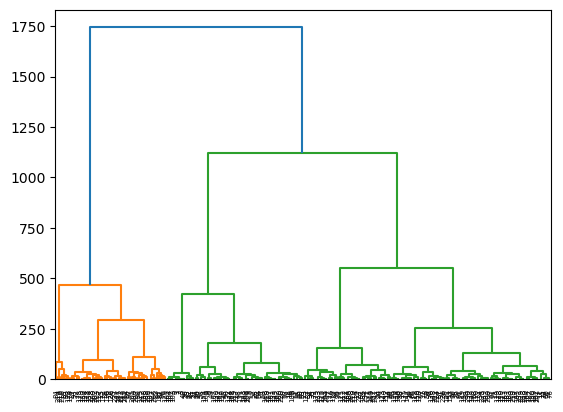

In [9]:
from scipy.cluster.hierarchy import dendrogram,linkage
wardlink = linkage(df, method='ward')
dend = dendrogram(wardlink)

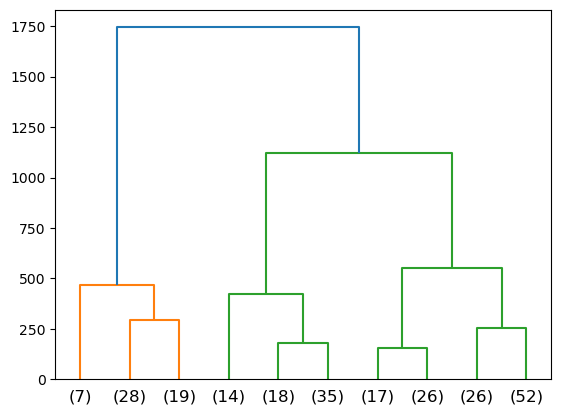

In [10]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [12]:
from scipy.cluster.hierarchy import fcluster

In [13]:
#Method 1

clusters = fcluster(wardlink, 2, criterion='maxclust')
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2,
       2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1,
       1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2],
      dtype=int32)

In [14]:
df['clusters'] = clusters

In [15]:
df.head()

,Calories,Total Fat (g),Cholesterol (mg),clusters
0,3,0.1,0,2
1,4,0.1,0,2
2,5,0.1,0,2
3,5,0.1,0,2
4,70,0.1,10,2


### K Means

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


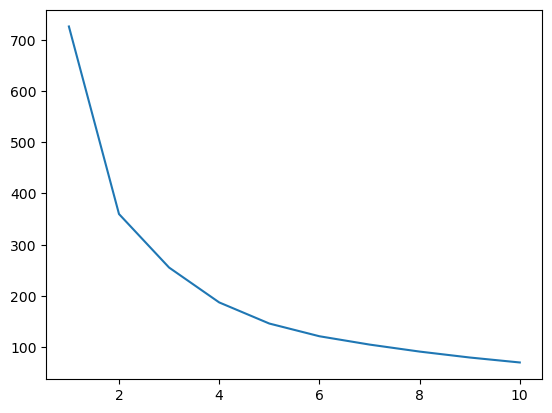

In [16]:
wss =[] 

for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

plt.plot(range(1,11), wss)

In [24]:
wss

[725.9999999999998,
 359.8766566722338,
 255.38517611312926,
 187.3340804406436,
 146.105997026588,
 121.28808276343263,
 105.03627178051633,
 91.36405343323513,
 79.78911881930074,
 70.08723579352717]

In [47]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
labels = k_means.labels_

In [48]:
df["Clus_kmeans"] = labels
df.head(5)

,Calories,Total Fat (g),Cholesterol (mg),clusters,Clus_kmeans,sil_width
0,3,0.1,0,2,1,0.548014
1,4,0.1,0,2,1,0.548874
2,5,0.1,0,2,1,0.549660
3,5,0.1,0,2,1,0.549660
4,70,0.1,10,2,1,0.603502


In [49]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(scaled_df,labels)
sil_width = silhouette_samples(scaled_df,labels)
df["sil_width"] = sil_width
df.head(5)

,Calories,Total Fat (g),Cholesterol (mg),clusters,Clus_kmeans,sil_width
0,3,0.1,0,2,1,0.554278
1,4,0.1,0,2,1,0.555155
2,5,0.1,0,2,1,0.555953
3,5,0.1,0,2,1,0.555953
4,70,0.1,10,2,1,0.610354


In [50]:
silhouette_samples(scaled_df,labels).min()

-0.04997378232838186

In [51]:
silhouette_score(scaled_df,labels)

0.37501416927869285

In [22]:
df.to_csv('both.csv')